# Logistic Regression

- The first thing to say is that logistic regression is not a regression, but a classification learning algorithm.


- The name comes from statistics and is due to the fact that the mathematical formulation of logistic regression is similar to that of linear regression.


- Logistic regression is used to find the probability of event = Success or event = Failure.


- It is used to when the dependent variable is binary (0/1, True/False, Yes/No) in nature.

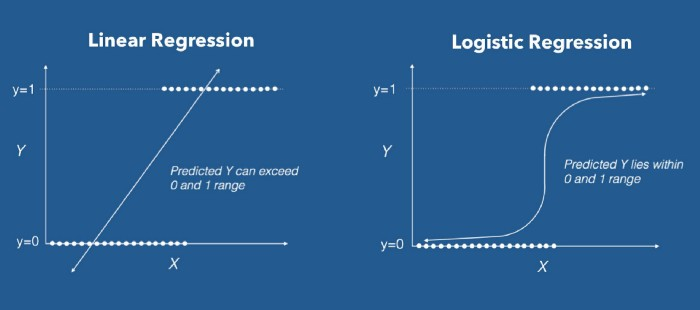

# Sigmoid Function

- In order to make predicted values into probabilities, we use the Sigmoid function (logistic function).

- The sigmoid function makes any real value into another value between 0 and 1.

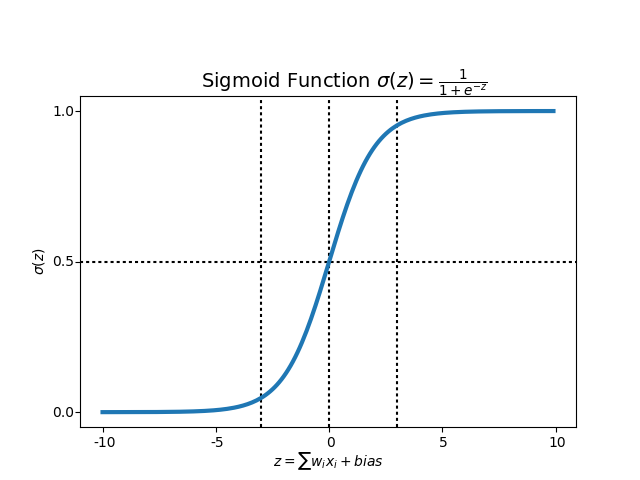

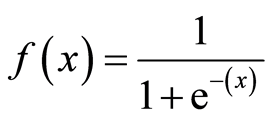

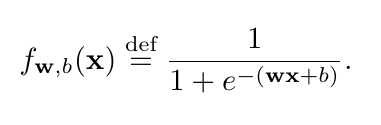

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [2]:
df = pd.read_csv('dataset/titanic2.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df2 = df.iloc[0:500, 0:6]

In [6]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0
...,...,...,...,...,...,...
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0


In [7]:
df2.shape

(500, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
filt = (df['Survived'] == 1) 

df.loc[filt, ['Pclass']].value_counts()

Pclass
1         136
3         119
2          87
dtype: int64

In [10]:
filt = (df['Survived'] == 0) 

df.loc[filt, ['Pclass']].value_counts()

Pclass
3         372
2          97
1          80
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

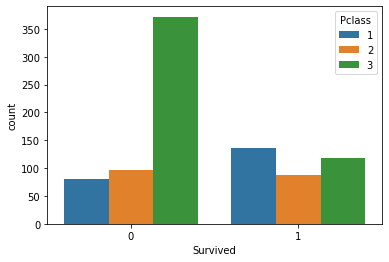

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=df)

## People Survived by gender

In [12]:
filt = (df['Survived'] == 0) 

df.loc[filt, 'Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [13]:
filt = (df['Survived'] == 1) 

df.loc[filt, 'Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

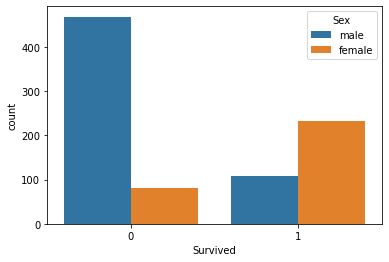

In [14]:
sns.countplot(x='Survived', hue='Sex', data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

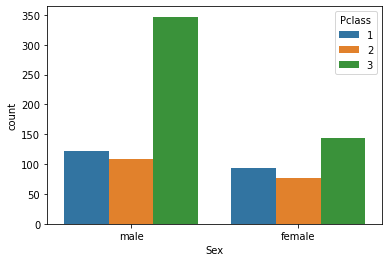

In [15]:
sns.countplot(x='Sex', hue='Pclass', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

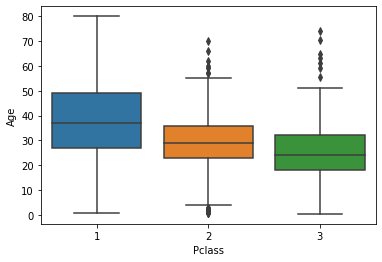

In [16]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [19]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [20]:
df['Embarked'].mode()[0]

'S'

In [21]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
dummies = pd.get_dummies(df[['Embarked', 'Sex']])

dummies

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,0,1,0,1
...,...,...,...,...,...
886,0,0,1,0,1
887,0,0,1,1,0
888,0,0,1,1,0
889,1,0,0,0,1


In [26]:
# Uncessary columns

df.drop(['Sex', 'Embarked', 'Name', 'PassengerId', 'Cabin', 'Ticket'], axis = 1, inplace=True)

In [27]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [28]:
df = pd.concat([df, dummies], axis = 1)

In [29]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [30]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,0.543351,-0.543351
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.131900,0.131900
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336,-0.084153,0.084153
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,0.114631,-0.114631
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.245489,-0.245489
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.182333,-0.182333
Embarked_C,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.082853,-0.082853
Embarked_Q,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.074115,-0.074115
Embarked_S,-0.149683,0.074053,-0.019336,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.119224,0.119224
Sex_female,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224,1.000000,-1.000000


<AxesSubplot:>

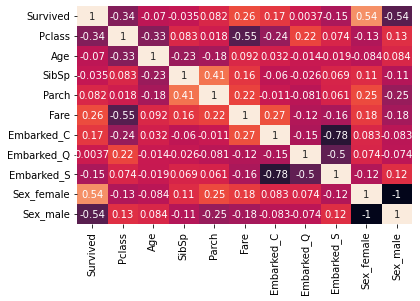

In [31]:
sns.heatmap(df.corr(), annot=True, cbar=False) # Pearson correlation

In [32]:
X = df.drop('Survived', axis=1)

y = df['Survived']

In [33]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,1,0,1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [35]:
logit_reg = LogisticRegression()

In [36]:
logit_reg.fit(X_train, y_train)

/home/pythonlove/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
logit_reg.score(X_train, y_train)

0.8041733547351525

In [38]:
logit_reg.score(X_test, y_test)

0.8097014925373134

In [39]:
y_pred = logit_reg.predict(X_test)

y_pred[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [40]:
y_test.head(10)

590    0
131    0
628    0
195    1
230    1
646    0
75     0
586    0
569    1
287    0
Name: Survived, dtype: int64

##  Model Performance Assessment

- Once you have a model which our learning algorithm has built using the training set, how can you say how good the model is? You use the test set to assess the model.


- If our model performs well on test set, we say that our model generalizes well or, simply, that it’s good.


- To be more rigorous, machine learning specialists use various formal metrics and tools to assess the model performance.

# Confusion matrix 

- A confusion matrix is a summary of prediction results on a classification problem.


- The number of correct and incorrect predictions are summarized with count values and broken down by each class. 


-  It can help you to determine mistake patterns. For example, a confusion matrix could reveal that a model trained to recognize different species of animals tends to mistakenly predict “cat” instead of “panther,” or “mouse” instead of “rat.” 


- In this case, you can decide to add more labeled examples of these species to help the learning algorithm to “see” the difference between them.


- Alternatively, you might add additional features the learning algorithm can use to build a model that would better distinguish between these species.

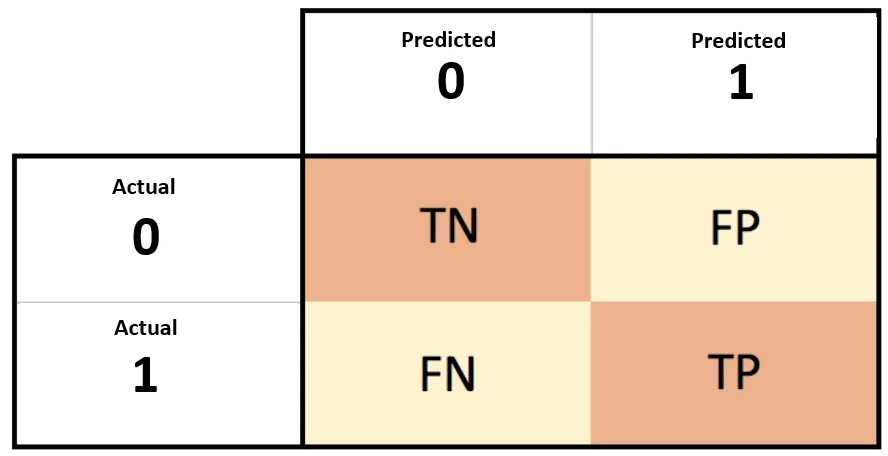

In [41]:
confusion_matrix(y_test, y_pred)

array([[151,  23],
       [ 28,  66]])

In [42]:
# confusion_matrix(y_pred, y_test)

In [43]:
confusion_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

confusion_mat

Predicted,0,1
Actual,,
0,151,23
1,28,66


In [44]:
y_test.value_counts()

0    174
1     94
Name: Survived, dtype: int64

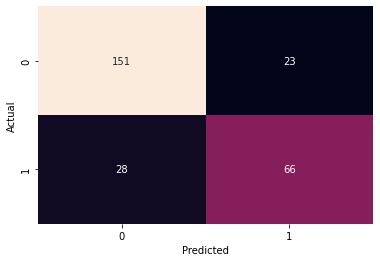

In [45]:
sns.heatmap(confusion_mat, annot=True, fmt='.10g', cbar=False);

#  Precision/Recall

- The two most frequently used metrics to assess the model are precision and recall. 

## Precision

- It is the ratio of correct positive predictions to the overall number of positive predictions:
- It is the accuracy of the positive predictions
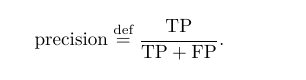

## Recall

- It is the ratio of correct positive predictions to the overall number of positive examples in the dataset
- This is the ratio of positive instances that are correctly detected by the classifier

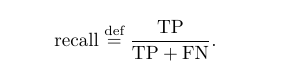

In [46]:
precision_score(y_test, y_pred)

0.7415730337078652

In [47]:
recall_score(y_test, y_pred)

0.7021276595744681

- In the case of the spam detection problem, we want to have high precision (we want to avoid making mistakes by detecting that a legitimate message is spam) and we are ready to tolerate lower recall (we tolerate some spam messages in our inbox).

___

#  Accuracy

- Accuracy is given by the number of correctly classified examples divided by the total number of classified examples.

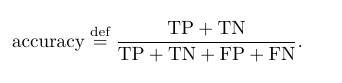